In [1]:
#integrals

In [2]:
import random

import sympy as smp
import numpy as np
import pandas as pd
import scipy.integrate as integrate
import scipy.constants as const
import matplotlib.pyplot as plt

from sympy.plotting import plot

In [3]:
"""
t, E = smp.symbols('t E')
s = 4*E*E
M, Gamma = smp.symbols('M Gamma')
pi, alpha = smp.symbols('pi alpha')
Lambda = smp.symbols('Lambda')
a, b, c = smp.symbols('a b c')
s_caret = s / Lambda / Lambda
F = (1 + a*s_caret) / (1 - b*s_caret + a*s_caret*s_caret)

dsigma = 4 * pi * alpha * Gamma / pow(M,3) * F*F/s * \
         (1 + 2*t/s - 2*M*M/s + 2*t*t/s/s - 2*M*M*t/s/s + M*M*M*M/s/s)

#from Alexandr Chumakov
a_ = 0.161013
b_ = 1.47861 
c_ = 0.771806
Lambda_ = 0.456748

#f0
a_ = 0.011
b_ = 0.190
Lambda_ = 350
M_ = 990
Gamma_ = 0.31*1e-3

#a0
a_ = 0.0027
b_ = 0.090
Lambda_ = 250
M_ = 980
Gamma_ = 0.30*1e-3

dsigma = dsigma.subs(a,a_).subs(b,b_).subs(Lambda,Lambda_).subs(M,M_).subs(Gamma,Gamma_)
dsigma = dsigma.subs(pi,const.pi).subs(alpha,const.alpha)

"""

"\nt, E = smp.symbols('t E')\ns = 4*E*E\nM, Gamma = smp.symbols('M Gamma')\npi, alpha = smp.symbols('pi alpha')\nLambda = smp.symbols('Lambda')\na, b, c = smp.symbols('a b c')\ns_caret = s / Lambda / Lambda\nF = (1 + a*s_caret) / (1 - b*s_caret + a*s_caret*s_caret)\n\ndsigma = 4 * pi * alpha * Gamma / pow(M,3) * F*F/s *          (1 + 2*t/s - 2*M*M/s + 2*t*t/s/s - 2*M*M*t/s/s + M*M*M*M/s/s)\n\n#from Alexandr Chumakov\na_ = 0.161013\nb_ = 1.47861 \nc_ = 0.771806\nLambda_ = 0.456748\n\n#f0\na_ = 0.011\nb_ = 0.190\nLambda_ = 350\nM_ = 990\nGamma_ = 0.31*1e-3\n\n#a0\na_ = 0.0027\nb_ = 0.090\nLambda_ = 250\nM_ = 980\nGamma_ = 0.30*1e-3\n\ndsigma = dsigma.subs(a,a_).subs(b,b_).subs(Lambda,Lambda_).subs(M,M_).subs(Gamma,Gamma_)\ndsigma = dsigma.subs(pi,const.pi).subs(alpha,const.alpha)\n\n"

In [4]:
"""
energies = list(range(500, 1500, 25))
energies = [x / 1000 for x in energies]
integrals_pb = []
integrals_mev = []
for e in energies:
    
    dsigma_t = dsigma.subs(E,e)
    
    def dsigma_fun(T):
        return dsigma_t.subs(t,T) 
    
    E_E = e
    M_E = 0.511e-3
    M_H = M_
    E_H = E_E + (M_H*M_H) / (4 * E_E)
    
    def convM(a, b) :  
        return a[3]*b[3] - sum( np.array(a[:3]) * np.array(b[:3]) )

    def tFromAngles(r, theta, phi):
        p_e = np.sqrt( E_E*E_E - M_E*M_E )
        p_minus = np.array([ 0.0,  0.0,   p_e, E_E ])
        p_plus  = np.array([ 0.0,  0.0,  -p_e, E_E ])
        q = ( r * np.sin(theta) * np.cos(phi),
              r * np.sin(theta) * np.sin(phi),
              r * np.cos(theta),
              E_H )
        return convM(p_minus - q, p_minus - q)
    
    arg = np.linspace(0, 1, 1000)
    r   = np.sqrt( E_H**2 - M_H**2 )

    angles = np.mgrid[0:1:100j, 0:1:100j].reshape(2,-1).T

    df2 = pd.DataFrame(angles, columns=["theta", "phi"])
    df2["t"] = np.nan
    df2["theta"] = df2["theta"].apply( lambda x: np.arccos(2 * x - 1) )
    df2[ "phi" ] = df2[ "phi" ].apply( lambda x: x * 2 * np.pi )

    for i in range(len(df2)):
        df2["t"][i] = tFromAngles(r, df2["theta"][i], df2["phi"][i])

    df2 = df2.astype('float64')

    t_max = df2["t"].max()
    t_min = df2["t"].min()
    
    integral_mev = smp.integrate(dsigma_t, (t, t_min, t_max))
    integral_pb  = integral_mev / (2.56819*10e-9)
    integrals_mev.append( integral_mev )
    integrals_pb.append( integral_pb )


print(integrals_pb)
"""

'\nenergies = list(range(500, 1500, 25))\nenergies = [x / 1000 for x in energies]\nintegrals_pb = []\nintegrals_mev = []\nfor e in energies:\n    \n    dsigma_t = dsigma.subs(E,e)\n    \n    def dsigma_fun(T):\n        return dsigma_t.subs(t,T) \n    \n    E_E = e\n    M_E = 0.511e-3\n    M_H = M_\n    E_H = E_E + (M_H*M_H) / (4 * E_E)\n    \n    def convM(a, b) :  \n        return a[3]*b[3] - sum( np.array(a[:3]) * np.array(b[:3]) )\n\n    def tFromAngles(r, theta, phi):\n        p_e = np.sqrt( E_E*E_E - M_E*M_E )\n        p_minus = np.array([ 0.0,  0.0,   p_e, E_E ])\n        p_plus  = np.array([ 0.0,  0.0,  -p_e, E_E ])\n        q = ( r * np.sin(theta) * np.cos(phi),\n              r * np.sin(theta) * np.sin(phi),\n              r * np.cos(theta),\n              E_H )\n        return convM(p_minus - q, p_minus - q)\n    \n    arg = np.linspace(0, 1, 1000)\n    r   = np.sqrt( E_H**2 - M_H**2 )\n\n    angles = np.mgrid[0:1:100j, 0:1:100j].reshape(2,-1).T\n\n    df2 = pd.DataFrame(angl

In [5]:
t, E = smp.symbols('t E')
s = 4*E*E
M, Gamma = smp.symbols('M Gamma')
pi, alpha = smp.symbols('pi alpha')
Lambda = smp.symbols('Lambda')
a, b = smp.symbols('a b')
s_caret = s / Lambda / Lambda
F = (1 + a*s_caret) / (1 - b*s_caret + a*s_caret*s_caret)

dsigma = 4 * pi * alpha * Gamma / pow(M,3) * F*F/s * \
         (1 + 2*t/s - 2*M*M/s + 2*t*t/s/s - 2*M*M*t/s/s + M*M*M*M/s/s)

#a0
a_ = 0.0027
b_ = 0.090
Lambda_ = 250
M_ = 980
Gamma_ = 0.30*1e-3

dsigma = dsigma.subs(a,a_).subs(b,b_).subs(Lambda,Lambda_).subs(M,M_).subs(Gamma,Gamma_)
dsigma = dsigma.subs(pi,const.pi).subs(alpha,const.alpha)

 Численно расчитываем интегралы на сетке по энергиям

In [6]:
energies = list(range(500, 1500, 25))
integrals_pb = []
integrals_mev = []

for e in energies:
    dsigma_t = dsigma.subs(E,e)
    t_max = 0
    t_min = M_*M_ - 4*e*e

    integral_mev = smp.integrate(dsigma_t, (t, t_min, t_max))
    integral_pb  = integral_mev / (2.56819*10e-15)
    integrals_mev.append( integral_mev )
    integrals_pb.append( integral_pb )

print(energies, "\n")
print(integrals_pb)

energies = np.array(energies)
integrals_pb = np.array(integrals_pb)
integrals_mev = np.array(integrals_mev)

[500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000, 1025, 1050, 1075, 1100, 1125, 1150, 1175, 1200, 1225, 1250, 1275, 1300, 1325, 1350, 1375, 1400, 1425, 1450, 1475] 

[0.000812608303600208, 0.0279536460023217, 0.101470327060685, 0.187691568844112, 0.244486544182925, 0.258479001689922, 0.240574910101557, 0.207301330205563, 0.170689559583093, 0.136978988159120, 0.108467466983452, 0.0854039862652200, 0.0671832872002140, 0.0529575844594182, 0.0419042921399313, 0.0333207163615261, 0.0266412513805574, 0.0214243658990260, 0.0173308238559390, 0.0141019615210230, 0.0115410750353715, 0.00949851839262925, 0.00786017951928369, 0.00653873235280700, 0.00546705950277319, 0.00459332785909598, 0.00387730512510379, 0.00328760120818994, 0.00279959685077156, 0.00239388280592324, 0.00205507887536128, 0.00177093634761894, 0.00153165261237347, 0.00132934526704378, 0.00115764663617115, 0.00101138961417948, 0.000886363092899171, 0.000779120659601961, 0.00

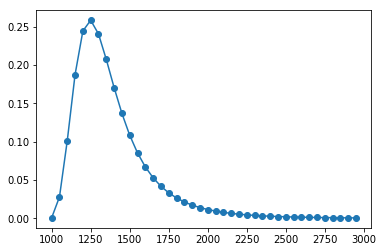

In [7]:
plt.plot(2 * energies, integrals_pb, "o-")

In [8]:
1/ (2.56819*10e-9 )

38937929.04730569

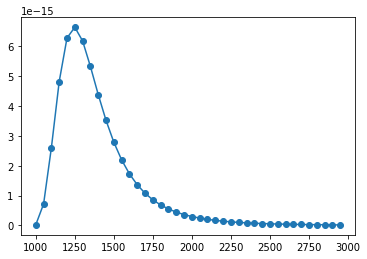

In [9]:
plt.plot(2 * energies, integrals_mev, "o-")

In [10]:
%time
data = pd.read_csv("integrals.csv", "\s+")

CPU times: user 13 µs, sys: 3 µs, total: 16 µs
Wall time: 10.5 µs


In [11]:
%time
data["s_sqrt"] = data["Energy"]*2

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.34 µs


In [12]:
%time
data["python_pb"] = pd.Series(integrals_pb)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [13]:
%time
data["python_mev"] = pd.Series(integrals_mev)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.58 µs


In [14]:
%time
data = data.astype('float64')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


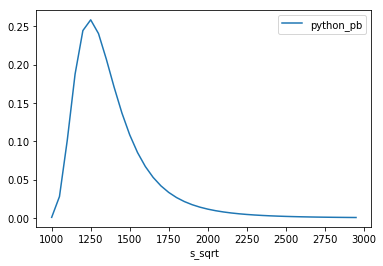

In [ ]:
data.plot(x = "s_sqrt", y="python_pb")

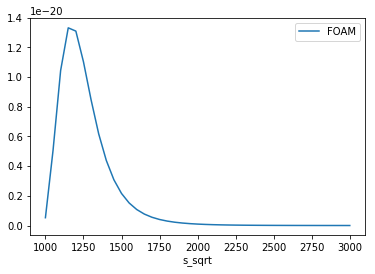

In [ ]:
data.plot(x = "s_sqrt", y="FOAM")

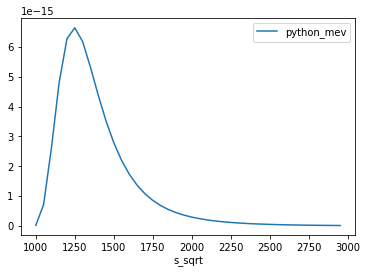

In [ ]:
data.plot(x = "s_sqrt", y="python_mev")

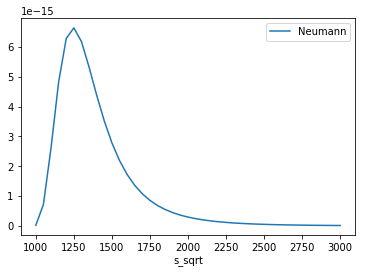

In [ ]:
data.plot(x = "s_sqrt", y="Neumann")

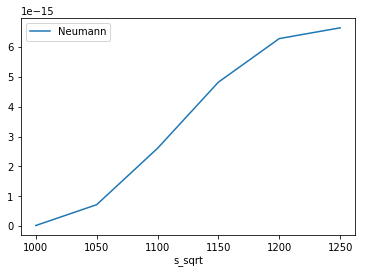

In [ ]:
data[:6].plot(x = "s_sqrt", y="Neumann")

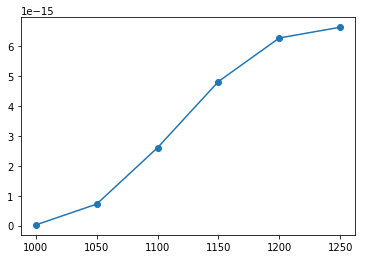

In [ ]:
plt.plot(2 * energies[:6], integrals_mev[:6], "o-")

In [ ]:

for i in range(10):
    print( random.random() )

0.4937872265703319
0.0734102076839993
0.11860055541815284
0.07477160964190344
0.7649926295470385
0.23987997727727006
0.46265789346391073
0.4970154223468819
0.4580311707040502
0.6045345082691088


Пробую смоделировать Нейман на Питоне

In [ ]:
import random

Nevents = 10000
integrals_neum = []
energies = list(range(500, 1500, 25))

for e in energies:
    events = 0
    accepted = 0
    print("\tENERGY IS", e)
    
    dsigma_t = dsigma.subs(E,e)
    t_max = 0
    t_min = M_*M_ - 4*e*e
    major = max( dsigma_t.subs(t, t_min), dsigma_t.subs(t, t_max) )
    
    print("major =", major, ", t_min =", t_min, ", t_max =", t_max)
    print("dsigma(t_min) =", dsigma_t.subs(t, t_min), ", dsigma(t_max) =", dsigma_t.subs(t, t_max) )
    
    for i in range(Nevents):
        flag = True
        while flag:
            T = random.random() * (t_max - t_min) + t_min
            f = random.random() * major
            p = dsigma_t.subs(t, T)
            events = events + 1
            if accepted < 10:
                print("t =", T, ", f =", f, ", p =", p)
            if p < f:
                flag = False
                accepted = accepted + 1
        if accepted < 10:
            print("ACCEPTED")
    integrals_neum.append( (t_max-t_min)*major*accepted/events ) 
           

	ENERGY IS 500
major = 7.90504742129931e-22 , t_min = -39600 , t_max = 0
dsigma(t_min) = 7.90504742129931e-22 , dsigma(t_max) = 7.90504742129931e-22
t = -10828.716515809181 , f = 6.05338265989547e-22 , p = 4.76395782755549e-22
ACCEPTED
t = -12779.472054161972 , f = 3.06265176570906e-22 , p = 4.44944047449750e-22
t = -36948.25780067034 , f = 3.77574248146786e-22 , p = 6.91724663278981e-22
t = -11941.500468448226 , f = 3.76020596604116e-22 , p = 4.57514413998768e-22
t = -35130.335915120406 , f = 5.21927112962989e-22 , p = 6.32197314839650e-22
t = -25834.643322815373 , f = 6.74500549564040e-23 , p = 4.31967690905195e-22
t = -37657.2645648198 , f = 7.09941713449921e-22 , p = 7.16747183254100e-22
t = -37355.99421695217 , f = 7.86996799312609e-22 , p = 7.05990797092051e-22
ACCEPTED
t = -12348.375718473671 , f = 2.12782946339298e-22 , p = 4.51234060649140e-22
t = -8076.547375187802 , f = 3.84832494622872e-22 , p = 5.33817888829031e-22
t = -18039.891028292695 , f = 5.76258413268899e-22 , p = 3

In [ ]:
energies = np.array(energies)
integrals_neum = np.array(integrals_neum)
print(energies)
print(integrals_neum)
print( len(energies), len(integrals_neum))
plt.plot(2 * energies, integrals_neum, "o-")

In [ ]:
data.plot(x = "s_sqrt", y="python_mev")

Отношение мажоранты метода Неймана в С и в Питоне

In [1]:
majors_py = np.array([7.90504742129931e-22, 7.57814294089049e-21, 1.56607619743979e-20, \
                      1.99680037361127e-20, 1.96378616942810e-20, 1.65376977416552e-20, \
                      1.27023453613018e-20, 9.26323865944715e-21, 6.57807953219845e-21])
majors_c_old  = np.array([2.7452639e-22, 2.6748855e-21, 5.8012031e-21, \
                      8.0318512e-21, 8.8763428e-21, 8.6531198e-21, \
                      7.8616533e-21, 6.8698825e-21, 5.8797968e-21])
majors_c  = np.array([1.64377e-21, 1.6241432e-20, 3.2731812e-20, \
                      3.8924991e-20, 3.498361e-20, 2.6948569e-20, \
                      1.9168395e-20, 1.3147812e-20, 8.9106199e-21])

majors_rel = majors_c /  majors_py
majors_arg = np.array( range(500, 701, 25) )

plt.plot(2 * majors_arg, majors_rel, "o-")

NameError: name 'np' is not defined